In [214]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import linear_model


# Data Sample preparation

In [267]:
data = pd.read_csv('Fifa 23 Players Data.csv',sep=',')
data

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,D. Collins,Darren Collins,47,56,110000,"ST,RM",CAM,Republic of Ireland,https://cdn.sofifa.net/players/243/725/23_60.png,21,...,50,44,50,41,38,41,40,36,40,15
18535,Yang Dejiang,Dejiang Yang,47,57,90000,CDM,CDM,China PR,https://cdn.sofifa.net/players/261/933/23_60.png,17,...,45,45,45,47,48,47,49,49,49,15
18536,L. Mullan,Liam Mullan,47,67,130000,CM,RM,Northern Ireland,https://cdn.sofifa.net/players/267/823/23_60.png,18,...,52,49,52,46,44,46,46,42,46,17
18537,D. McCallion,Daithí McCallion,47,61,100000,CB,CB,Republic of Ireland,https://cdn.sofifa.net/players/267/824/23_60.png,17,...,33,33,33,44,42,44,47,49,47,15


Objetives of the project: 

1. Ask interesting and thoughtful questions and find the data to answer them.
2. Focus on improving in areas that are hard for you or learning more about something with which you feel comfortable.
3. Apply the statistical and machine learning techniques we have learned.
4. Create useful and clear graphs.
5. Present your insights in a thoughtful, clear, and accurate way.


In [268]:
#data.columns

simple_data = data[['Known As', 'Full Name', 'Overall', 'Potential', 'Value(in Euro)',
       'Positions Played', 'Best Position', 'Nationality', 'Image Link', 'Age',
       'Height(in cm)', 'Weight(in kg)', 'TotalStats', 'BaseStats',
       'Club Name', 'Wage(in Euro)', 'Release Clause', 'Club Position',
       'Contract Until', 'Club Jersey Number', 'Joined On', 'On Loan',
       'Preferred Foot', 'Weak Foot Rating', 'Skill Moves',
       'International Reputation', 'National Team Name',
       'National Team Image Link', 'National Team Position',
       'National Team Jersey Number', 'Attacking Work Rate',
       'Defensive Work Rate','Defensive Work Rate', 'Pace Total', 'Shooting Total', 'Passing Total',
       'Dribbling Total', 'Defending Total', 'Physicality Total']]

simple_data['Original_Market_Value']= simple_data['Value(in Euro)']
simple_data

C:\Users\rozio\anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,Attacking Work Rate,Defensive Work Rate,Defensive Work Rate,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Original_Market_Value
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,Low,Low,Low,81,89,90,94,34,64,54000000
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,Medium,Medium,Medium,80,88,83,87,39,78,64000000
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,High,Medium,Medium,75,91,79,86,44,83,84000000
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,High,High,High,74,88,93,87,64,77,107500000
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,High,Low,Low,97,89,80,92,36,76,190500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,D. Collins,Darren Collins,47,56,110000,"ST,RM",CAM,Republic of Ireland,https://cdn.sofifa.net/players/243/725/23_60.png,21,...,Medium,Medium,Medium,68,48,43,51,31,33,110000
18535,Yang Dejiang,Dejiang Yang,47,57,90000,CDM,CDM,China PR,https://cdn.sofifa.net/players/261/933/23_60.png,17,...,Medium,Medium,Medium,55,37,41,47,48,39,90000
18536,L. Mullan,Liam Mullan,47,67,130000,CM,RM,Northern Ireland,https://cdn.sofifa.net/players/267/823/23_60.png,18,...,High,Medium,Medium,64,40,49,52,37,35,130000
18537,D. McCallion,Daithí McCallion,47,61,100000,CB,CB,Republic of Ireland,https://cdn.sofifa.net/players/267/824/23_60.png,17,...,Medium,Medium,Medium,52,24,25,32,52,41,100000


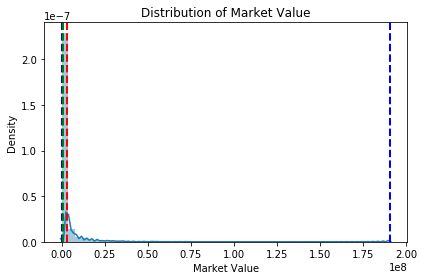

{'mean': 2875461.4033658775, 'median': 1000000.0, 'min': 0, 'max': 190500000, 'std': 7635128.948731085, 'skewness': 7.77610355563307}


In [269]:

#plt.subplot(2, 4)
sns.distplot(simple_data['Value(in Euro)'])
plt.axvline(simple_data['Value(in Euro)'].mean(), color='red', linestyle='dashed', linewidth=2)  # Add a red dashed line at the mean
plt.axvline(simple_data['Value(in Euro)'].min(), color='blue', linestyle='dashed', linewidth=2)  
plt.axvline(simple_data['Value(in Euro)'].max(), color='blue', linestyle='dashed', linewidth=2) 
plt.axvline(simple_data['Value(in Euro)'].median(), color='green', linestyle='dashed', linewidth=2) 
plt.xlabel('Market Value')
plt.ylabel('Density')
plt.title('Distribution of Market Value')

plt.tight_layout()
plt.show()

# calculate summary statistics for each column
summary_stats = {'mean': simple_data['Value(in Euro)'].mean(),
                              'median': simple_data['Value(in Euro)'].median(),
                              'min': simple_data['Value(in Euro)'].min(),
                              'max': simple_data['Value(in Euro)'].max(),
                              'std': simple_data['Value(in Euro)'].std(),
                              'skewness': simple_data['Value(in Euro)'].skew()}

# display summary statistics
print(summary_stats)




# Market Value variable analysis

In [270]:
import sklearn
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
simple_data['normalized_market_value'] = scaler.fit_transform(simple_data[['Value(in Euro)']])
simple_data['normalized_market_value']



C:\Users\rozio\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


0        0.283465
1        0.335958
2        0.440945
3        0.564304
4        1.000000
           ...   
18534    0.000577
18535    0.000472
18536    0.000682
18537    0.000525
18538    0.000315
Name: normalized_market_value, Length: 18539, dtype: float64

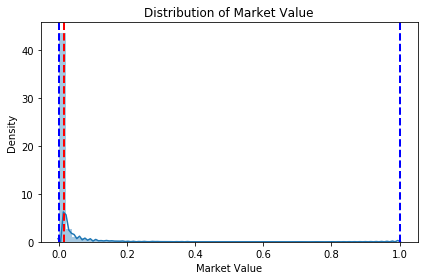

In [271]:
#plt.subplot(2, 4)
sns.distplot(simple_data['normalized_market_value'])
plt.axvline(simple_data['normalized_market_value'].mean(), color='red', linestyle='dashed', linewidth=2)  # Add a red dashed line at the mean
plt.axvline(simple_data['normalized_market_value'].min(), color='blue', linestyle='dashed', linewidth=2)  
plt.axvline(simple_data['normalized_market_value'].max(), color='blue', linestyle='dashed', linewidth=2) 
#plt.axvline(a.median(), color='green', linestyle='dashed', linewidth=2) 
plt.xlabel('Market Value')
plt.ylabel('Density')
plt.title('Distribution of Market Value')

plt.tight_layout()
plt.show()


In [272]:
#there are pre made functions for this
import sklearn
from sklearn.preprocessing import StandardScaler

simple_data['standarized'] = StandardScaler().fit_transform(simple_data[['Value(in Euro)']])
simple_data['standarized'] 

C:\Users\rozio\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


0         6.696143
1         8.005914
2        10.625456
3        13.703418
4        24.574516
           ...    
18534    -0.362212
18535    -0.364832
18536    -0.359593
18537    -0.363522
18538    -0.368761
Name: standarized, Length: 18539, dtype: float64

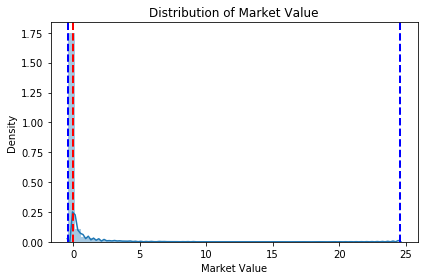

In [273]:
#plt.subplot(2, 4)
sns.distplot(simple_data['standarized'])
plt.axvline(simple_data['standarized'].mean(), color='red', linestyle='dashed', linewidth=2)  # Add a red dashed line at the mean
plt.axvline(simple_data['standarized'].min(), color='blue', linestyle='dashed', linewidth=2)  
plt.axvline(simple_data['standarized'].max(), color='blue', linestyle='dashed', linewidth=2) 
#plt.axvline(a.median(), color='green', linestyle='dashed', linewidth=2) 
plt.xlabel('Market Value')
plt.ylabel('Density')
plt.title('Distribution of Market Value')

plt.tight_layout()
plt.show()


# Outliers detection in market value variable

In [274]:
percent_95= np.percentile(simple_data['Value(in Euro)'],95)
cond_dev_no = (simple_data['Value(in Euro)']>=percent_95)
cond_dev = (simple_data['Value(in Euro)']<percent_90)
#Percentile and then ,standarized
#IQR = Q3-Q1 
#CANDIDATE TO BE OUTLIER-z Q3+1.5*IQR, Q1-1.5*IQR
#REMOVE AFTER 98% PERCENTILE

simple_data.loc[cond_dev_no, 'dev_flag']= 'NO'
simple_data.loc[cond_dev, 'dev_flag']= 'YES'
sample_dev = simple_data[simple_data['Value(in Euro)']<=percent_95]


C:\Users\rozio\anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\rozio\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


          Known As
dev_flag          
NO             945
YES          16652


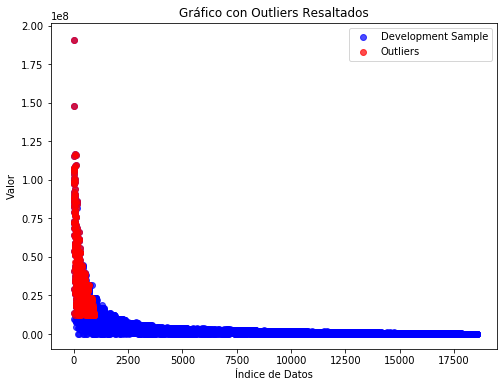

In [275]:
outliers = []
outlier_detection = simple_data.groupby(['dev_flag']).agg({'Known As':'count'})
print(outlier_detection)
outliers = simple_data[simple_data['dev_flag']=='NO']['Value(in Euro)']
outliers
data = simple_data['Value(in Euro)']
data
# Crea el gráfico
plt.figure(figsize=(8, 6))
plt.scatter(range(len(data)), data, label='Development Sample', color='blue', alpha=0.7)
plt.scatter(range(len(outliers)), outliers, label='Outliers', color='red', alpha=0.7)

# Personaliza el gráfico
plt.xlabel('Índice de Datos')
plt.ylabel('Valor')
plt.title('Gráfico con Outliers Resaltados')
plt.legend()

# Muestra el gráfico
plt.show()

C:\Users\rozio\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


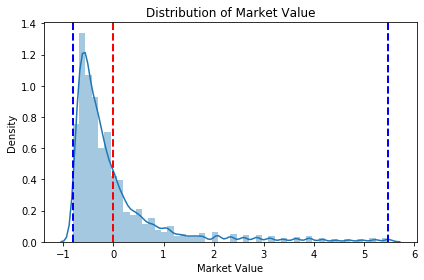

In [276]:
#plt.subplot(2, 4)

sample_dev['standarized'] = StandardScaler().fit_transform(sample_dev[['Value(in Euro)']])
sample_dev['standarized'] 
sns.distplot(sample_dev['standarized'])
plt.axvline(sample_dev['standarized'].mean(), color='red', linestyle='dashed', linewidth=2)  # Add a red dashed line at the mean
plt.axvline(sample_dev['standarized'].min(), color='blue', linestyle='dashed', linewidth=2)  
plt.axvline(sample_dev['standarized'].max(), color='blue', linestyle='dashed', linewidth=2) 
#plt.axvline(a.median(), color='green', linestyle='dashed', linewidth=2) 
plt.xlabel('Market Value')
plt.ylabel('Density')
plt.title('Distribution of Market Value')

plt.tight_layout()
plt.show()


# Lineal regression with all numerical variables

In [277]:
num = sample_dev.select_dtypes(include=[np.number])
num

,Overall,Potential,Value(in Euro),Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Wage(in Euro),Release Clause,...,International Reputation,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Original_Market_Value,normalized_market_value,standarized
26,88,88,10000000,35,185,80,1428,478,85000,18500000,...,3,89,84,75,89,54,87,10000000,0.052493,4.433093
33,87,87,9000000,35,188,82,1399,478,80000,17100000,...,4,88,83,74,88,61,84,9000000,0.047244,3.908703
50,86,86,12000000,37,183,79,2012,411,115000,22200000,...,4,49,54,73,72,87,76,12000000,0.062992,5.481874
92,84,84,7500000,36,184,82,2137,433,75000,13900000,...,4,61,69,73,70,83,77,7500000,0.039370,3.122117
94,84,84,4700000,37,193,92,1265,443,46000,7800000,...,3,80,80,65,85,43,90,4700000,0.024672,1.653824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,47,56,110000,21,174,68,1287,274,500,193000,...,1,68,48,43,51,31,33,110000,0.000577,-0.753127
18535,47,57,90000,17,175,60,1289,267,500,158000,...,1,55,37,41,47,48,39,90000,0.000472,-0.763615
18536,47,67,130000,18,170,65,1333,277,500,332000,...,1,64,40,49,52,37,35,130000,0.000682,-0.742640
18537,47,61,100000,17,178,65,1113,226,500,218000,...,1,52,24,25,32,52,41,100000,0.000525,-0.758371


In [278]:
num = num.drop(columns=['Original_Market_Value','normalized_market_value','standarized'])
X = num.drop(columns=['Value(in Euro)']) #set with independant vbles 
y = num['Value(in Euro)'] #dependant vbles
X

,Overall,Potential,Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Wage(in Euro),Release Clause,Joined On,Weak Foot Rating,Skill Moves,International Reputation,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total
26,88,88,35,185,80,1428,478,85000,18500000,2019,3,1,3,89,84,75,89,54,87
33,87,87,35,188,82,1399,478,80000,17100000,2012,1,1,4,88,83,74,88,61,84
50,86,86,37,183,79,2012,411,115000,22200000,2020,3,2,4,49,54,73,72,87,76
92,84,84,36,184,82,2137,433,75000,13900000,2021,3,3,4,61,69,73,70,83,77
94,84,84,37,193,92,1265,443,46000,7800000,2012,3,1,3,80,80,65,85,43,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,47,56,21,174,68,1287,274,500,193000,2018,3,2,1,68,48,43,51,31,33
18535,47,57,17,175,60,1289,267,500,158000,2021,3,2,1,55,37,41,47,48,39
18536,47,67,18,170,65,1333,277,500,332000,2022,3,2,1,64,40,49,52,37,35
18537,47,61,17,178,65,1113,226,500,218000,2022,3,2,1,52,24,25,32,52,41


                                 OLS Regression Results                                
Dep. Variable:         Value(in Euro)   R-squared (uncentered):                   0.940
Model:                            OLS   Adj. R-squared (uncentered):              0.939
Method:                 Least Squares   F-statistic:                          1.522e+04
Date:                Sun, 05 Nov 2023   Prob (F-statistic):                        0.00
Time:                        12:45:12   Log-Likelihood:                     -2.5992e+05
No. Observations:               17646   AIC:                                  5.199e+05
Df Residuals:                   17628   BIC:                                  5.200e+05
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

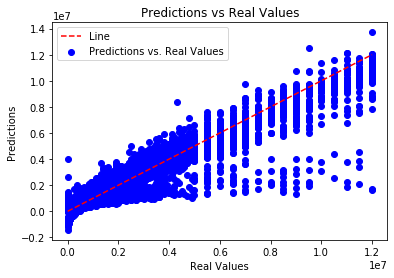

In [279]:
model = linear_model.LinearRegression()
result = model.fit(X,y)
result.score(X,y)
model = sm.OLS(y, X).fit()

# Obtener un resumen completo
summary = model.summary()
print(summary)


# Genera predicciones con el modelo
predictions = model.predict(X)  # Donde X es tu conjunto de datos
X['Pred']=predictions
# Crear un gráfico de dispersión para comparar predicciones y valores reales
plt.scatter(y, predictions, color='blue', label='Predictions vs. Real Values')
plt.plot([min(y), max(y)], [min(y), max(y)], linestyle='--', color='red', label='Line')


error = {'Predictions': predictions, 'Real values': y}
df = pd.DataFrame(error)
plt.xlabel('Real Values')
plt.ylabel('Predictions')
plt.title('Predictions vs Real Values')
plt.legend()

plt.show()


# Correlation matrix for all numerical variables

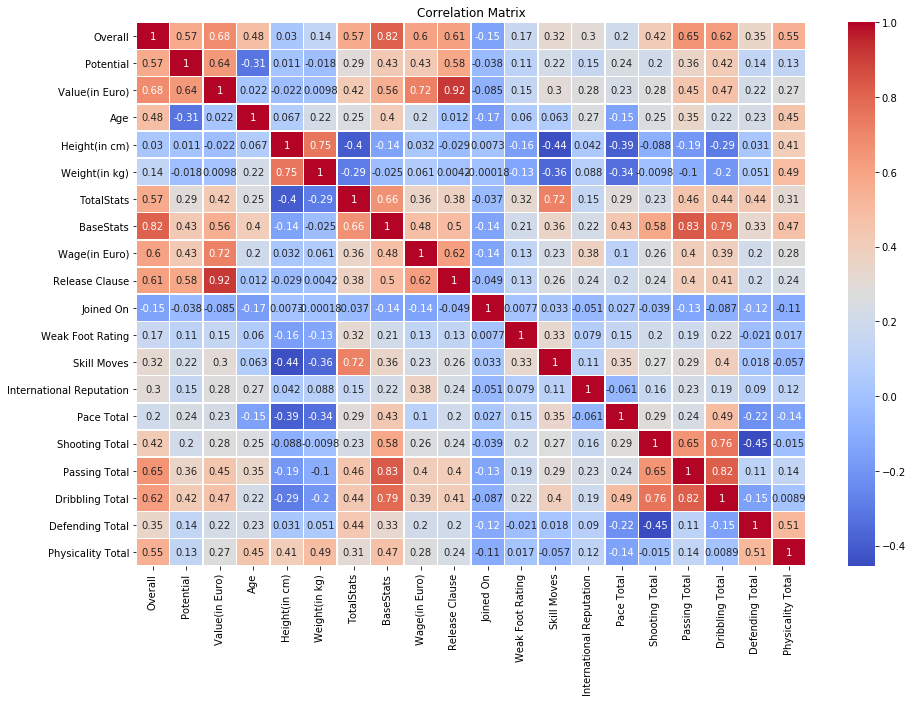

In [280]:
# Calculate the correlation matrix
correlation_matrix = num.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

#We are going to drop those variables that are pretty correlated, because we cannot include both in the same estimation

# Process of selection of variables

# Second model proposal

In [281]:
#'Potential', 'BaseStats','Release Clause',
X_2 = num.drop(columns=['Height(in cm)', 'Weight(in kg)','Weak Foot Rating','Physicality Total','Potential','BaseStats','Value(in Euro)','Joined On','Passing Total','Shooting Total','Passing Total','Dribbling Total','Defending Total']) #set with independant vbles 
y = num['Value(in Euro)'] #dependant vbles
X_2

,Overall,Age,TotalStats,Wage(in Euro),Release Clause,Skill Moves,International Reputation,Pace Total
26,88,35,1428,85000,18500000,1,3,89
33,87,35,1399,80000,17100000,1,4,88
50,86,37,2012,115000,22200000,2,4,49
92,84,36,2137,75000,13900000,3,4,61
94,84,37,1265,46000,7800000,1,3,80
...,...,...,...,...,...,...,...,...
18534,47,21,1287,500,193000,2,1,68
18535,47,17,1289,500,158000,2,1,55
18536,47,18,1333,500,332000,2,1,64
18537,47,17,1113,500,218000,2,1,52


In [282]:
import statsmodels.api as sm
model = linear_model.LinearRegression()
result = model.fit(X_2,y)
result.score(X_2,y)
 #Overall', 'Potential', 'Age', 'Height(in cm)', 'Weight(in kg)','TotalStats', 'BaseStats', 
#'Wage(in Euro)', 'Release Clause',
#'Weak Foot Rating', 'Skill Moves', 'International Reputation',
#'Pace Total', 'Shooting Total', 'Passing Total', 'Dribbling Total',
#'Defending Total', 'Physicality Total'],
#display(result.intercept_)
#display(result.coef_)
# Ajustar el modelo de regresión lineal múltiple
model = sm.OLS(y, X_2).fit()

# Obtener un resumen completo
summary = model.summary()
print(summary)

                                 OLS Regression Results                                
Dep. Variable:         Value(in Euro)   R-squared (uncentered):                   0.933
Model:                            OLS   Adj. R-squared (uncentered):              0.933
Method:                 Least Squares   F-statistic:                          3.077e+04
Date:                Sun, 05 Nov 2023   Prob (F-statistic):                        0.00
Time:                        12:45:23   Log-Likelihood:                     -2.6081e+05
No. Observations:               17646   AIC:                                  5.216e+05
Df Residuals:                   17638   BIC:                                  5.217e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

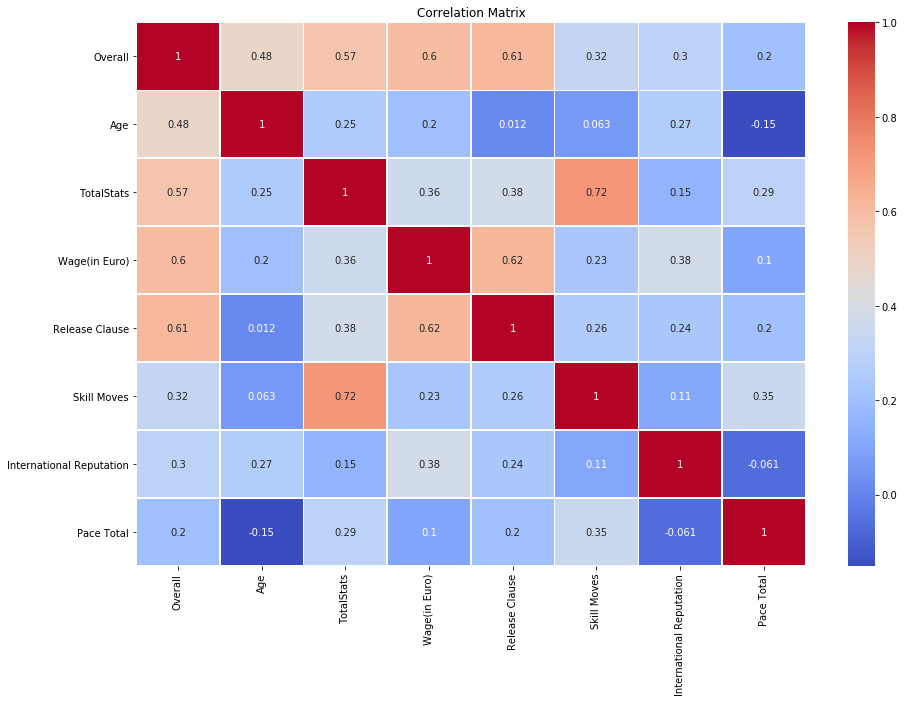

In [283]:
model_dev = X_2[['Overall', 'Age', 'TotalStats', 'Wage(in Euro)', 'Release Clause',
       'Skill Moves', 'International Reputation', 'Pace Total']]

# Calculate the correlation matrix
correlation_matrix_mod_dev = model_dev.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix_mod_dev, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

 

# Third model proposal

In [284]:
X_3 = X_2.drop(columns=['Wage(in Euro)','Skill Moves','Pace Total','Age','TotalStats']) #set with independant vbles 
#'Wage(in Euro)', 'Release Clause','Skill Moves'
y = num['Value(in Euro)'] #dependant vbles
X_3
model = linear_model.LinearRegression()
result = model.fit(X_3,y)
result.score(X_3,y)
X_2.columns #Overall', 'Potential', 'Age', 'Height(in cm)', 'Weight(in kg)','TotalStats', 'BaseStats', 
#'Wage(in Euro)', 'Release Clause',
#'Weak Foot Rating', 'Skill Moves', 'International Reputation',
#'Pace Total', 'Shooting Total', 'Passing Total', 'Dribbling Total',
#'Defending Total', 'Physicality Total'],
#display(result.intercept_)
#display(result.coef_)
# Ajustar el modelo de regresión lineal múltiple
model = sm.OLS(y, X_3).fit()

# Obtener un resumen completo
summary_3 = model.summary()
print(summary_3)

                                 OLS Regression Results                                
Dep. Variable:         Value(in Euro)   R-squared (uncentered):                   0.907
Model:                            OLS   Adj. R-squared (uncentered):              0.907
Method:                 Least Squares   F-statistic:                          5.733e+04
Date:                Sun, 05 Nov 2023   Prob (F-statistic):                        0.00
Time:                        12:45:26   Log-Likelihood:                     -2.6372e+05
No. Observations:               17646   AIC:                                  5.275e+05
Df Residuals:                   17643   BIC:                                  5.275e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

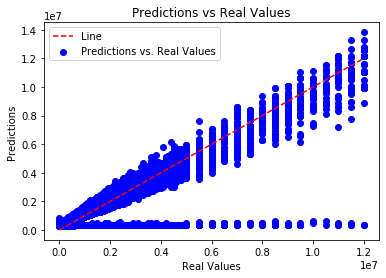

In [285]:
# Genera predicciones con el modelo
predictions = model.predict(X_3)  # Donde X es tu conjunto de datos
X_3['Pred']=predictions
# Crear un gráfico de dispersión para comparar predicciones y valores reales
plt.scatter(y, predictions, color='blue', label='Predictions vs. Real Values')
plt.plot([min(y), max(y)], [min(y), max(y)], linestyle='--', color='red', label='Line')


error = {'Predictions': predictions, 'Real values': y}
df = pd.DataFrame(error)
plt.xlabel('Real Values')
plt.ylabel('Predictions')
plt.title('Predictions vs Real Values')
plt.legend()

plt.show()


In [286]:
df['dif']=df['Predictions']-df['Real values']
df['Percent']=(df['Predictions']-df['Real values'])/df['Real values']
df.head(10)
df[df['dif']==df['dif'].max()]
X_3['Value(in Euro)']=y
X_3['dif']=X_3['Pred']-X_3['Value(in Euro)']
X_3 = X_3.sort_values(by='dif', ascending=False)
X_3 
df[df['dif']==df['dif'].max()]
X_3['Percent']=(X_3['Pred']-X_3['Value(in Euro)'])/X_3['Value(in Euro)']
X_3

,Overall,Release Clause,International Reputation,Pred,Value(in Euro),dif,Percent
3204,72,15500000,1,7.602895e+06,5500000,2.102895e+06,0.382344
1649,75,28800000,1,1.383205e+07,12000000,1.832053e+06,0.152671
1489,75,27600000,1,1.327095e+07,11500000,1.770949e+06,0.153996
3825,71,12400000,1,6.149958e+06,4400000,1.749958e+06,0.397718
5150,70,11600000,1,5.772470e+06,4099999,1.672471e+06,0.407920
...,...,...,...,...,...,...,...
1229,76,0,1,3.689747e+05,11500000,-1.113103e+07,-0.967915
1242,76,0,1,3.689747e+05,11500000,-1.113103e+07,-0.967915
1085,76,0,1,3.689747e+05,11500000,-1.113103e+07,-0.967915
900,77,0,1,3.723930e+05,12000000,-1.162761e+07,-0.968967


C:\Users\rozio\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


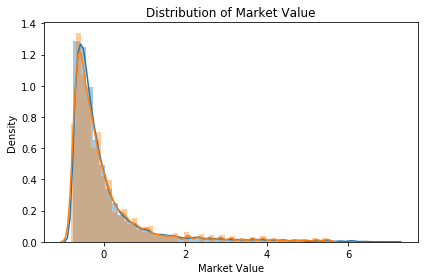

In [287]:
X_3['Pred_stand'] = StandardScaler().fit_transform(X_3[['Pred']])
sns.distplot(X_3['Pred_stand'])                                                             
sample_dev['standarized'] = StandardScaler().fit_transform(sample_dev[['Value(in Euro)']])
sample_dev['standarized'] 
sns.distplot(sample_dev['standarized'])
#plt.axvline(sample_dev['standarized'].mean(), color='red', linestyle='dashed', linewidth=2)  # Add a red dashed line at the mean
#plt.axvline(sample_dev['standarized'].min(), color='blue', linestyle='dashed', linewidth=2)  
#plt.axvline(sample_dev['standarized'].max(), color='blue', linestyle='dashed', linewidth=2) 
#plt.axvline(a.median(), color='green', linestyle='dashed', linewidth=2) 
plt.xlabel('Market Value')
plt.ylabel('Density')
plt.title('Distribution of Market Value')

plt.tight_layout()
plt.show()


# Correlation of the independant variables of the third model proposal vs. dependant variable

0.682796803835785


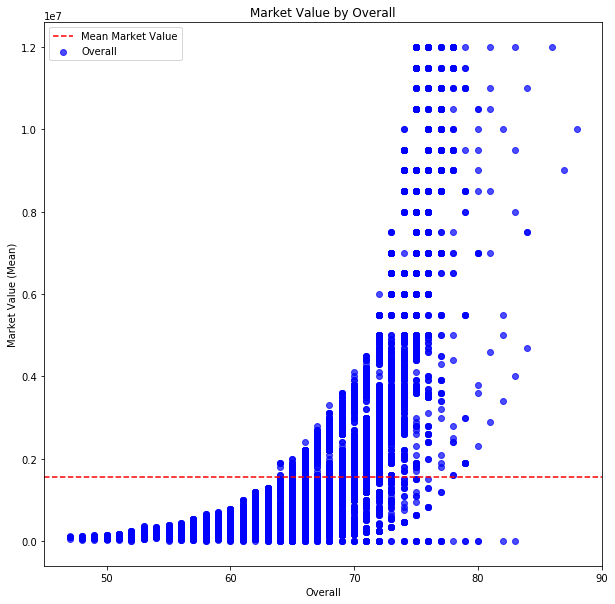

In [289]:
plt.figure(figsize=(10, 10))
correlation = np.corrcoef(X_3['Overall'], X_3['Value(in Euro)'])[0, 1]
# Create a scatter plot
plt.scatter(X_3['Overall'], X_3['Value(in Euro)'], label='Overall', color='blue', alpha=0.7)
# label=f'Correlation: {correlation:.2f}'
plt.xlabel('Overall')
plt.ylabel('Market Value (Mean)')

# Add a horizontal line for the mean market value
mean_market_value = X_3['Value(in Euro)'].mean()
plt.axhline(mean_market_value, color='red', linestyle='--', label='Mean Market Value')


print(correlation)

plt.title('Market Value by Overall')
plt.legend()
plt.show()

0.9175579993788356


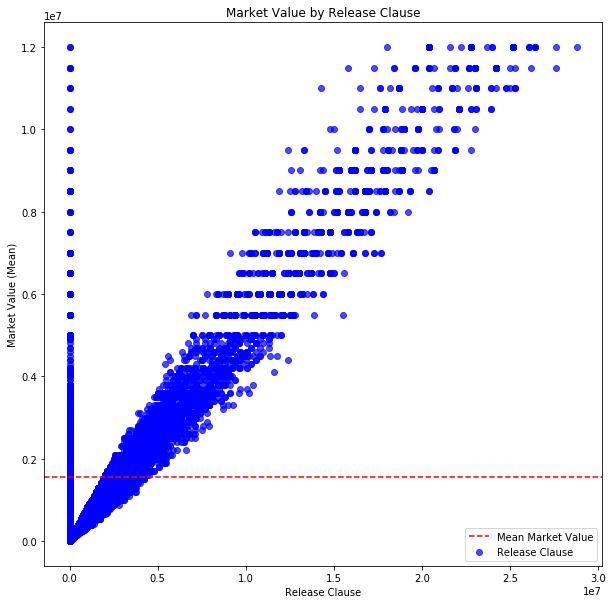

In [290]:
plt.figure(figsize=(10, 10))
correlation = np.corrcoef(X_3['Release Clause'], X_3['Value(in Euro)'])[0, 1]
# Create a scatter plot
plt.scatter(X_3['Release Clause'], X_3['Value(in Euro)'], label='Release Clause', color='blue', alpha=0.7)
# label=f'Correlation: {correlation:.2f}'
plt.xlabel('Release Clause')
plt.ylabel('Market Value (Mean)')

# Add a horizontal line for the mean market value
mean_market_value = X_3['Value(in Euro)'].mean()
plt.axhline(mean_market_value, color='red', linestyle='--', label='Mean Market Value')


print(correlation)

plt.title('Market Value by Release Clause')
plt.legend()
plt.show()

0.2769921824732992


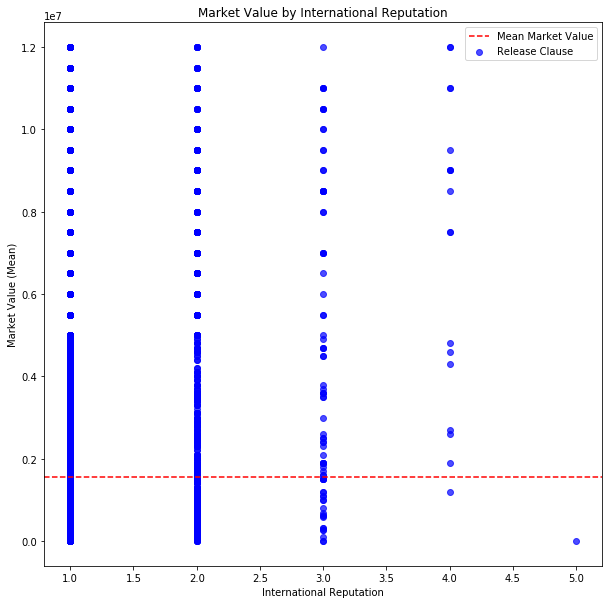

In [291]:
plt.figure(figsize=(10, 10))
correlation = np.corrcoef(X_3['International Reputation'], X_3['Value(in Euro)'])[0, 1]
# Create a scatter plot
plt.scatter(X_3['International Reputation'], X_3['Value(in Euro)'], label='Release Clause', color='blue', alpha=0.7)
# label=f'Correlation: {correlation:.2f}'
plt.xlabel('International Reputation')
plt.ylabel('Market Value (Mean)')

# Add a horizontal line for the mean market value
mean_market_value = X_3['Value(in Euro)'].mean()
plt.axhline(mean_market_value, color='red', linestyle='--', label='Mean Market Value')


print(correlation)

plt.title('Market Value by International Reputation')
plt.legend()
plt.show()

# Final model proposal

                                 OLS Regression Results                                
Dep. Variable:         Value(in Euro)   R-squared (uncentered):                   0.907
Model:                            OLS   Adj. R-squared (uncentered):              0.907
Method:                 Least Squares   F-statistic:                          8.588e+04
Date:                Sun, 05 Nov 2023   Prob (F-statistic):                        0.00
Time:                        12:47:06   Log-Likelihood:                     -2.6373e+05
No. Observations:               17646   AIC:                                  5.275e+05
Df Residuals:                   17644   BIC:                                  5.275e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

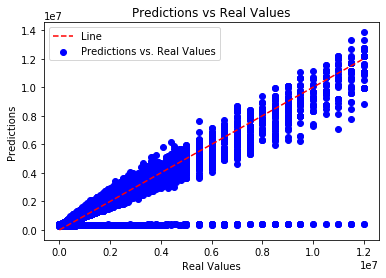

In [292]:
X_4 = X_2.drop(columns=['Wage(in Euro)','Skill Moves','Pace Total','Age','TotalStats','International Reputation']) #set with independant vbles 
#'Wage(in Euro)', 'Release Clause','Skill Moves'
y = num['Value(in Euro)'] #dependant vbles
X_4
model = linear_model.LinearRegression()
result = model.fit(X_4,y)
result.score(X_4,y)
#Overall', 'Potential', 'Age', 'Height(in cm)', 'Weight(in kg)','TotalStats', 'BaseStats', 
#'Wage(in Euro)', 'Release Clause',
#'Weak Foot Rating', 'Skill Moves', 'International Reputation',
#'Pace Total', 'Shooting Total', 'Passing Total', 'Dribbling Total',
#'Defending Total', 'Physicality Total'],
#display(result.intercept_)
#display(result.coef_)
# Ajustar el modelo de regresión lineal múltiple
model = sm.OLS(y, X_4).fit()

# Obtener un resumen completo
summary_4 = model.summary()
print(summary_4)


# Genera predicciones con el modelo
predictions = model.predict(X_4)  # Donde X es tu conjunto de datos
X_4['Pred']=predictions
# Crear un gráfico de dispersión para comparar predicciones y valores reales
plt.scatter(y, predictions, color='blue', label='Predictions vs. Real Values')
plt.plot([min(y), max(y)], [min(y), max(y)], linestyle='--', color='red', label='Line')


error = {'Predictions': predictions, 'Real values': y}
df = pd.DataFrame(error)
plt.xlabel('Real Values')
plt.ylabel('Predictions')
plt.title('Predictions vs Real Values')
plt.legend()

plt.show()


C:\Users\rozio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


                                 OLS Regression Results                                
Dep. Variable:         Value(in Euro)   R-squared (uncentered):                   0.907
Model:                            OLS   Adj. R-squared (uncentered):              0.907
Method:                 Least Squares   F-statistic:                          8.588e+04
Date:                Sun, 05 Nov 2023   Prob (F-statistic):                        0.00
Time:                        12:47:34   Log-Likelihood:                     -2.6373e+05
No. Observations:               17646   AIC:                                  5.275e+05
Df Residuals:                   17644   BIC:                                  5.275e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

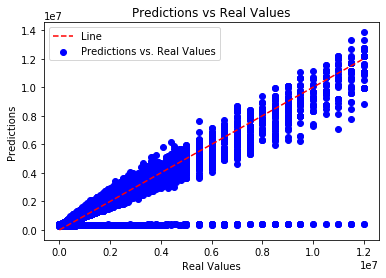

In [293]:
X_4 = X_2.drop(columns=['Wage(in Euro)','Skill Moves','Pace Total','Age','TotalStats','International Reputation']) #set with independant vbles 

#'Wage(in Euro)', 'Release Clause','Skill Moves'
y = num['Value(in Euro)'] #dependant vbles
X_4
model = linear_model.LogisticRegression(random_state=0)
result = model.fit(X_4,y)
result.score(X_4,y)
#Overall', 'Potential', 'Age', 'Height(in cm)', 'Weight(in kg)','TotalStats', 'BaseStats', 
#'Wage(in Euro)', 'Release Clause',
#'Weak Foot Rating', 'Skill Moves', 'International Reputation',
#'Pace Total', 'Shooting Total', 'Passing Total', 'Dribbling Total',
#'Defending Total', 'Physicality Total'],
#display(result.intercept_)
#display(result.coef_)
# Ajustar el modelo de regresión lineal múltiple
model = sm.OLS(y, X_4).fit()

# Obtener un resumen completo
summary_4 = model.summary()
print(summary_4)


# Genera predicciones con el modelo
predictions = model.predict(X_4)  # Donde X es tu conjunto de datos
X_4['Pred']=predictions
# Crear un gráfico de dispersión para comparar predicciones y valores reales
plt.scatter(y, predictions, color='blue', label='Predictions vs. Real Values')
plt.plot([min(y), max(y)], [min(y), max(y)], linestyle='--', color='red', label='Line')


error = {'Predictions': predictions, 'Real values': y}
df = pd.DataFrame(error)
plt.xlabel('Real Values')
plt.ylabel('Predictions')
plt.title('Predictions vs Real Values')
plt.legend()

plt.show()


# Distribution of the final independant variable standarized that is the driver of the model: Overall 

C:\Users\rozio\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


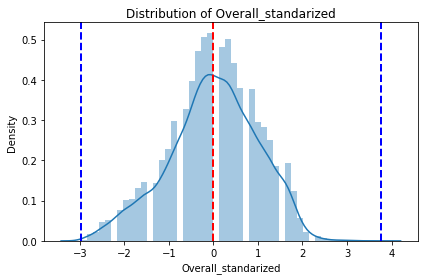

In [297]:
#plt.subplot(2, 4)

sample_dev['Overall_standarized'] = StandardScaler().fit_transform(sample_dev[['Overall']])
sample_dev['Overall_standarized'] 
sns.distplot(sample_dev['Overall_standarized'])
plt.axvline(sample_dev['Overall_standarized'].mean(), color='red', linestyle='dashed', linewidth=2)  # Add a red dashed line at the mean
plt.axvline(sample_dev['Overall_standarized'].min(), color='blue', linestyle='dashed', linewidth=2)  
plt.axvline(sample_dev['Overall_standarized'].max(), color='blue', linestyle='dashed', linewidth=2) 
#plt.axvline(a.median(), color='green', linestyle='dashed', linewidth=2) 
plt.xlabel('Overall_standarized')
plt.ylabel('Density')
plt.title('Distribution of Overall_standarized')

plt.tight_layout()
plt.show()


# Distribution of the real values vs. distribution of the predicted values

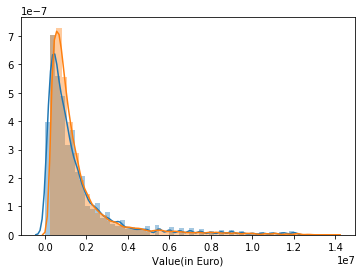

In [298]:
sns.distplot(sample_dev['Value(in Euro)'])
sns.distplot(X_4[['Pred']])

# Plot of the predicted values vs. driver of the model

No handles with labels found to put in legend.


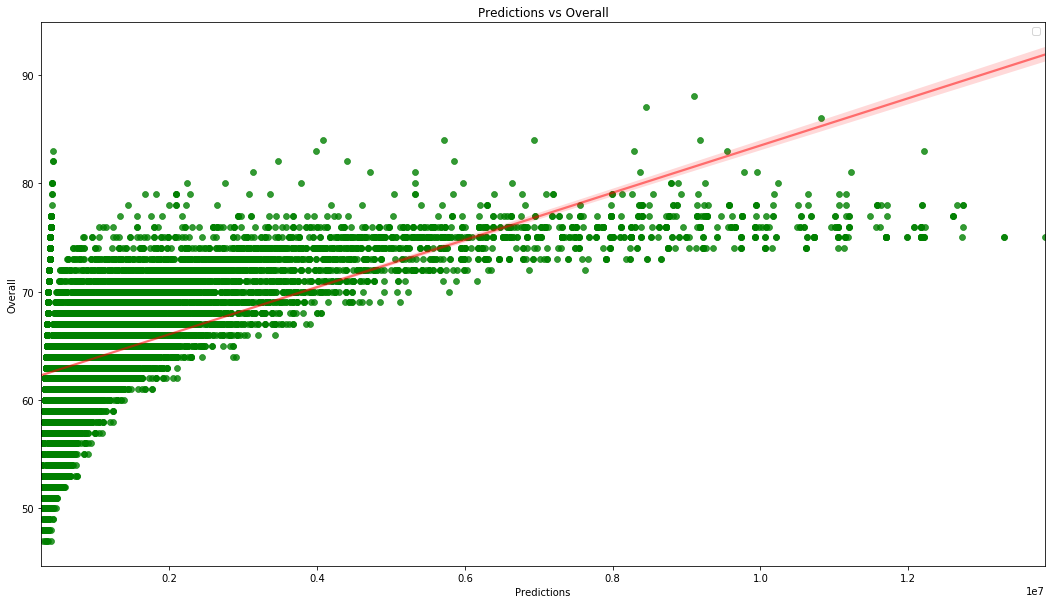

In [300]:
plt.figure(figsize=(18,10))
sns.regplot(predictions,X_4['Overall'],scatter_kws={'color':'green','edgecolor':'green','linewidth':0.7},line_kws={'color':'red','alpha':0.5})


#plt.scatter(X_4['Pred'], X_4['Overall'], label='Predictions', color='blue', alpha=0.7)

plt.xlabel('Predictions')
plt.ylabel('Overall')
plt.title('Predictions vs Overall')
plt.legend()

plt.show()

# Summary of the Market Value of each player by buckets using the driver of the model

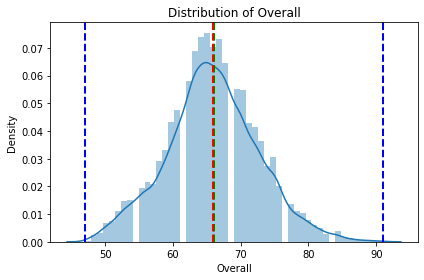

{'mean': 65.85204164194401, 'median': 66.0, 'min': 47, 'max': 91, 'std': 6.788352681607596, 'skewness': 0.10524967242893479}


In [301]:
#plt.subplot(2, 4)
sns.distplot(simple_data['Overall'])
plt.axvline(simple_data['Overall'].mean(), color='red', linestyle='dashed', linewidth=2)  # Add a red dashed line at the mean
plt.axvline(simple_data['Overall'].min(), color='blue', linestyle='dashed', linewidth=2)  
plt.axvline(simple_data['Overall'].max(), color='blue', linestyle='dashed', linewidth=2) 
plt.axvline(simple_data['Overall'].median(), color='green', linestyle='dashed', linewidth=2) 
plt.xlabel('Overall')
plt.ylabel('Density')
plt.title('Distribution of Overall')

plt.tight_layout()
plt.show()

# calculate summary statistics for each column
summary_overall = {'mean': simple_data['Overall'].mean(),
                              'median': simple_data['Overall'].median(),
                              'min': simple_data['Overall'].min(),
                              'max': simple_data['Overall'].max(),
                              'std': simple_data['Overall'].std(),
                              'skewness': simple_data['Overall'].skew()}

# display summary statistics
print(summary_overall)




In [309]:
# Define los límites de los intervalos (buckets)

percentile_25 = np.percentile(simple_data['Overall'], 25)
percentile_50 = np.percentile(simple_data['Overall'], 50)
percentile_75 = np.percentile(simple_data['Overall'], 75)
buckets = [0,int(percentile_25), int(percentile_50), int(percentile_75), int(simple_data['Overall'].max())]
# Utiliza la función cut de Pandas para bucketizar la columna 'variable'
simple_data['Overall_bucketized'] = pd.cut(simple_data['Overall'], bins=buckets)
simple_data['Overall_bucketized'].unique()


C:\Users\rozio\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


[(70, 91], (66, 70], (62, 66], (0, 62]]
Categories (4, interval[int64]): [(0, 62] < (62, 66] < (66, 70] < (70, 91]]

In [310]:
simple_data.groupby(['Overall_bucketized']).agg({'Known As':'count','Value(in Euro)':'mean'})

,Known As,Value(in Euro)
Overall_bucketized,,
"(0, 62]",5459,4.134922e+05
"(62, 66]",4712,9.248090e+05
"(66, 70]",4046,1.565229e+06
"(70, 91]",4322,9.338341e+06


In [318]:
cond_1=(simple_data['Overall_bucketized']=='(0, 62]')
cond_2=(simple_data['Overall_bucketized']=='(62, 66]')
cond_3=(simple_data['Overall_bucketized']=='(66, 70]')
cond_4=(simple_data['Overall_bucketized']=='(70, 91]')
simple_data.loc[cond_1, 'bucket'] = '0-62'
simple_data.loc[cond_2, 'bucket'] = '62-66'
simple_data.loc[cond_3, 'bucket'] = '66-70'
simple_data.loc[cond_4, 'bucket'] = '70-91'
simple_data.head(10)

C:\Users\rozio\anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\rozio\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,Passing Total,Dribbling Total,Defending Total,Physicality Total,Original_Market_Value,normalized_market_value,standarized,dev_flag,Overall_bucketized,bucket
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,90,94,34,64,54000000,0.283465,6.696143,NO,"(70, 91]",NaN
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,83,87,39,78,64000000,0.335958,8.005914,NO,"(70, 91]",NaN
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,79,86,44,83,84000000,0.440945,10.625456,NO,"(70, 91]",NaN
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,93,87,64,77,107500000,0.564304,13.703418,NO,"(70, 91]",NaN
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,80,92,36,76,190500000,1.000000,24.574516,NO,"(70, 91]",NaN
5,M. Salah,Mohamed Salah,90,90,115500000,RW,RW,Egypt,https://cdn.sofifa.net/players/209/331/23_60.png,30,...,82,90,45,75,115500000,0.606299,14.751234,NO,"(70, 91]",NaN
6,T. Courtois,Thibaut Courtois,90,91,90000000,GK,GK,Belgium,https://cdn.sofifa.net/players/192/119/23_60.png,30,...,75,90,46,89,90000000,0.472441,11.411319,NO,"(70, 91]",NaN
7,M. Neuer,Manuel Neuer,90,90,13500000,GK,GK,Germany,https://cdn.sofifa.net/players/167/495/23_60.png,36,...,91,88,56,91,13500000,0.070866,1.391571,NO,"(70, 91]",NaN
8,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,90,90,41000000,ST,ST,Portugal,https://cdn.sofifa.net/players/020/801/23_60.png,37,...,78,85,34,75,41000000,0.215223,4.993441,NO,"(70, 91]",NaN
9,V. van Dijk,Virgil van Dijk,90,90,98000000,CB,CB,Netherlands,https://cdn.sofifa.net/players/203/376/23_60.png,30,...,71,72,91,86,98000000,0.514436,12.459135,NO,"(70, 91]",NaN


In [328]:
gb = simple_data.groupby(['Overall_bucketized']).agg({'Known As':'count','Value(in Euro)':'mean'}).reset_index()
gb


,Overall_bucketized,Known As,Value(in Euro)
0,"(0, 62]",5459,4.134922e+05
1,"(62, 66]",4712,9.248090e+05
2,"(66, 70]",4046,1.565229e+06
3,"(70, 91]",4322,9.338341e+06


<BarContainer object of 4 artists>

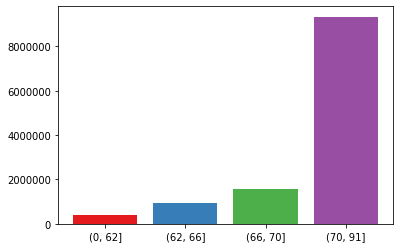

In [331]:
colors = sns.color_palette('Set1')
plt.bar(gb['Overall_bucketized'].astype(str), gb['Value(in Euro)'],color=colors)
